# Import Libarary

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Project4/')
!pwd

/content/drive/MyDrive/Project4


In [3]:
!pip install arabic-reshaper
!pip install python-bidi

In [4]:
import os
import re
import string
import numpy as np
import pandas as pd

import arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display

import nltk
from nltk.corpus import stopwords
from collections import  Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [5]:
data = pd.read_csv('Arabic Poetry Dataset (6th - 21st century)/all_poems.csv', low_memory=False)

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


In [8]:
df.head()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [9]:
df.shape

(58021, 9)

In [10]:
#dfresult = df.dropna(how='all', axis=1)
df = df.dropna(how='any',axis=0)

In [11]:
df.shape

(58020, 9)

## 4.	Categorize the poetry entries based on genre.

## 5.	Obtain some statistics from the dataset.
    o	how many verses do we have?
    o	how many verses according to genre?
    o	How many poets do we have?
    o	How many verses per poet?
    o	for which era does the verse belong?
    o	What is the most common word?
    o	How many words within each verse?

In [12]:
#for reshape arabic text befor visualization
def add_arabic_Reshaper(text):
    return  get_display(arabic_reshaper.reshape(text))

### how many verses do we have?

In [13]:
df.shape

(58020, 9)

###  how many verses according to genre?

In [14]:
groupby_poem_style = df.groupby('poem_style')
groupby_poem_style.first()

,poem_id,poem_link,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
poem_style,,,,,,,,
-,70027,http://www.adab.com/modules.php?name=Sh3er&doW...,هم اكسبوك من السباق رهانا فربحت انت وادركوا ا...,أحمد ياسين,السعودية,25,http://www.adab.com/modules.php?name=Sh3er&doW...,عبدالرحمن العشماوي
عامي,902,http://www.adab.com/modules.php?name=Sh3er&doW...,الا واشيب عيني يوم قالوا لي فمان اله وتحقت ان...,ألا واشيب عيني,السعودية,67,http://www.adab.com/modules.php?name=Sh3er&doW...,عبدالله الفيصل
فصحى,21,http://www.adab.com/modules.php?name=Sh3er&doW...,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [15]:
groupby_poem_style_count  = groupby_poem_style['poem_title'].count()
groupby_poem_style_count

poem_style
-          33
عامي       94
فصحى    57893
Name: poem_title, dtype: int64

In [16]:
res1 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poem_style_count.items()}
#res1
df_res1= pd.DataFrame(res1.items(), columns=['poem_style', 'count'])
df_res1

,poem_style,count
0,-,33
1,ﻲﻣﺎﻋ,94
2,ﻰﺤﺼﻓ,57893


[Text(0.5, 0, 'poem style'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'how many verses according to genre')]

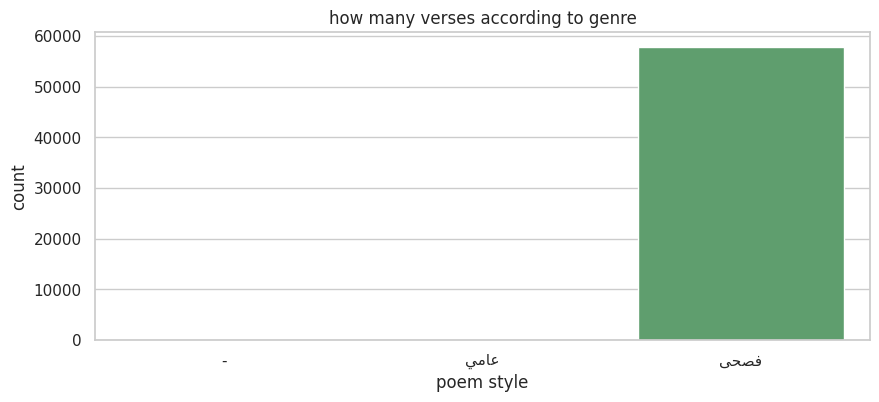

In [17]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="poem_style", y="count" ,data=df_res1)
ax.set(xlabel='poem style', ylabel='count', title='how many verses according to genre')

#plt.savefig("images/how many verses according to genre.pdf")


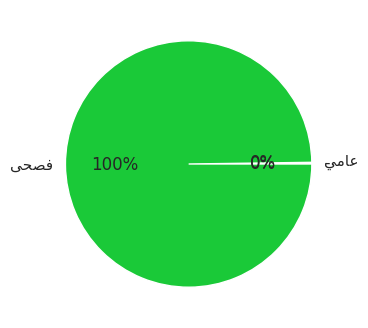

In [18]:
plt.figure(figsize=(8,4))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]
#create pie chart
plt.pie(df_res1['count'], labels = df_res1['poem_style'], colors = colors, autopct='%.0f%%')
plt.show()

#plt.savefig("images/how many verses according to genre.pdf")

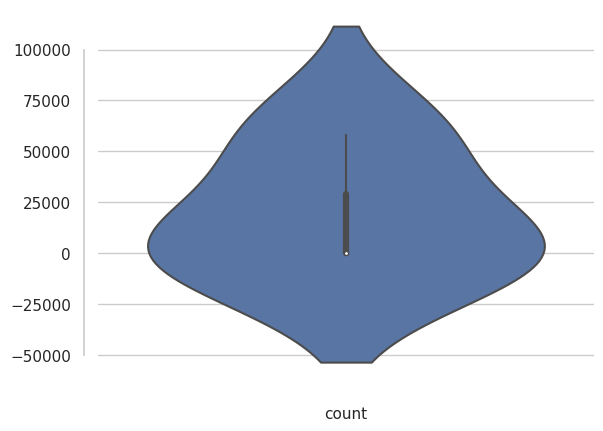

In [19]:
f, ax = plt.subplots()
sns.violinplot(data=df_res1)
sns.despine(offset=10, trim=True);

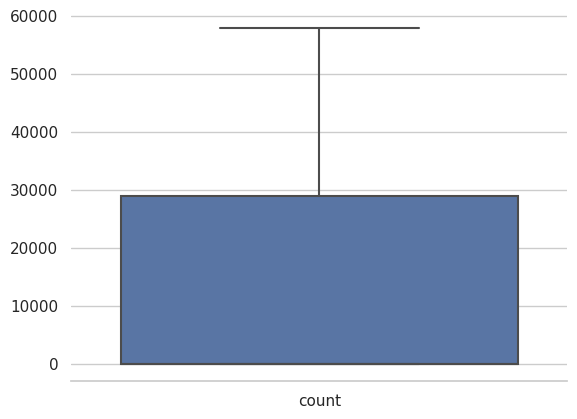

In [20]:
sns.set_style("whitegrid")
sns.boxplot(data=df_res1, palette="deep")
sns.despine(left=True)

###  How many poets do we have?

In [21]:
len(df.poet_name.unique())

652

In [22]:
# Select unique values from the species column
print(df['poet_name'].unique().tolist())

['بدر شاكر السياب', 'نزار قباني', 'أمل دنقل', 'فاروق جويدة', 'أولاد أحمد', 'عبدالوهاب البياتي', 'غازي القصيبي', 'عمر أبو ريشة', 'عبدالرحمن العشماوي', 'إيليا أبو ماضي', 'نازك الملائكة', 'سعدي يوسف', 'توفيق زياد', 'غادة السمان', 'يحيى السماوي', 'علي أحمد باكثير', 'عمرو بن كلثوم', 'أبو البقاء الرندي', 'محمد الفيتوري', 'عبدالله الفيصل', 'قاسم حداد', 'عبدالوهاب زاهدة', 'سعود الصاعدي', 'محمد سعيد الحبوبي', 'علي جعفر العلاق', 'عدنان الصائغ', 'عبدالحميد الصائح', 'مصطفى جمال الدين', 'عبدالله الفيفي', 'أحمد مطر', 'محمود مفلح', 'عبد الرحمن بارود', 'عبدالله السفياني', 'صلاح عبدالصبور', 'يزيد بن معاوية', 'بلند الحيدري', 'تركي عامر', 'طلعت سقيرق', 'إبراهيم ناجي', 'أسعد الجبوري', 'موسى حوامدة', 'نايف الجهني', 'جابر قميحة', 'أحمد عبدالمعطي حجازي', 'فاروق شوشة', 'طاهر زمخشري', 'المتنبي', 'أبوالعلاء المعري', 'الفرزدق', 'البحتري', 'إبراهيم نصر الله', 'محمد زيدان', 'محمود أمين', 'وديع سعادة', 'إبراهيم طوقان', 'علي محمود طه', 'ناصيف اليازجي', 'فدوى طوقان', 'أحمد دحبور', 'معين بسيسو', 'خليل حاوي', 'محمد الق

###  How many verses per poet?

In [23]:
#https://www.kaggle.com/code/ozkanozturk/pandas-groupby-with-details
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
#https://pandas.pydata.org/docs/user_guide/visualization.html

In [24]:
groupby_poet_name = df.groupby('poet_name')

In [25]:
groupby_poet_name.first()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link
poet_name,,,,,,,,
عبد الله الطيب,65221,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,كلما لاح برقها خفق القل ب وجاشت من الحنين الع...,بين الرياء والحياء,السودان,356,http://www.adab.com/modules.php?name=Sh3er&doW...
أحمد بشير العيلة,78082,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,منفي حيث تقشر عن جلدك راءحة الارض وتبتل ملابسك...,أوردة الباب المغلق,فلسطين,525,http://www.adab.com/modules.php?name=Sh3er&doW...
إبراهيم أحمد الوافي,7010,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,الرياض التي ترتدي جوربا لشتاء الثقيل وتنتعل ال...,وعلى المقيمين خارجها مراعاة فارق التصويت,السعودية,146,http://www.adab.com/modules.php?name=Sh3er&doW...
جابر أبو حسين,70566,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,-كون جديد كي تقدسك الشموس فانت بدء الضوء بدء ا...,هودجُها وعيونُ الريح,سوريا,442,http://www.adab.com/modules.php?name=Sh3er&doW...
طالب همّاش,74392,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لم يزل شاردا يتنادي مع الريح فوق اديم الصدي وا...,سماوات ليلى,سوريا,482,http://www.adab.com/modules.php?name=Sh3er&doW...
...,...,...,...,...,...,...,...,...
يزيد بن معاوية,64997,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,الا فامل لي كاسات خمر وغني بذكر سليمي والرباب...,ألاَ فَامْلَ لِي كَاسَاتِ خَمْـرٍ وَغَنِّنِـي,العصر الإسلامي,102,http://www.adab.com/modules.php?name=Sh3er&doW...
يموت بن مزرع,78997,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,مهلهل قد حلبت شطور دهري وكافحني بها الزمن الع...,مهلهلُ قد حلبتُ شطورَ دهري,العصر العباسي,545,http://www.adab.com/modules.php?name=Sh3er&doW...
يوسف الخال,73009,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا كل ما ادعي حملت صليبي معي املع ياسي واخنق ...,الفجر الجديد,لبنان,460,http://www.adab.com/modules.php?name=Sh3er&doW...


In [26]:
# Finding the values contained in the "يوسف الصائغ" group
groupby_poet_name.get_group('يوسف الصائغ')

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
39280,63189,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,شهداء عشرة نزلوا يوم اجازتهم لبصرة اربعة منهم ...,إجازة,العراق,309,http://www.adab.com/modules.php?name=Sh3er&doW...,يوسف الصائغ


In [27]:
groupby_poet_name_count = groupby_poet_name['poem_title'].count()
groupby_poet_name_count.head()

poet_name
  عبد الله الطيب          8
 أحمد بشير العيلة        15
 إبراهيم أحمد الوافي     25
 جابر أبو حسين           32
 طالب همّاش             113
Name: poem_title, dtype: int64

In [28]:
res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poet_name_count.items()}
#res2
df_res2= pd.DataFrame(res2.items(), columns=['poem_title', 'count'])
df_res2.head()

,poem_title,count
0,ﺐﻴﻄﻟﺍ ﷲ ﺪﺒﻋ,8
1,ﺔﻠﻴﻌﻟﺍ ﺮﻴﺸﺑ ﺪﻤﺣﺃ,15
2,ﻲﻓﺍﻮﻟﺍ ﺪﻤﺣﺃ ﻢﻴﻫﺍﺮﺑﺇ,25
3,ﻦﻴﺴﺣ ﻮﺑﺃ ﺮﺑﺎﺟ,32
4,ﺵﺎﻤﻫ ﺐﻟﺎﻃ,113


[Text(0.5, 0, 'count'),
 Text(0, 0.5, 'poem title'),
 Text(0.5, 1.0, 'How many verses per poet')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


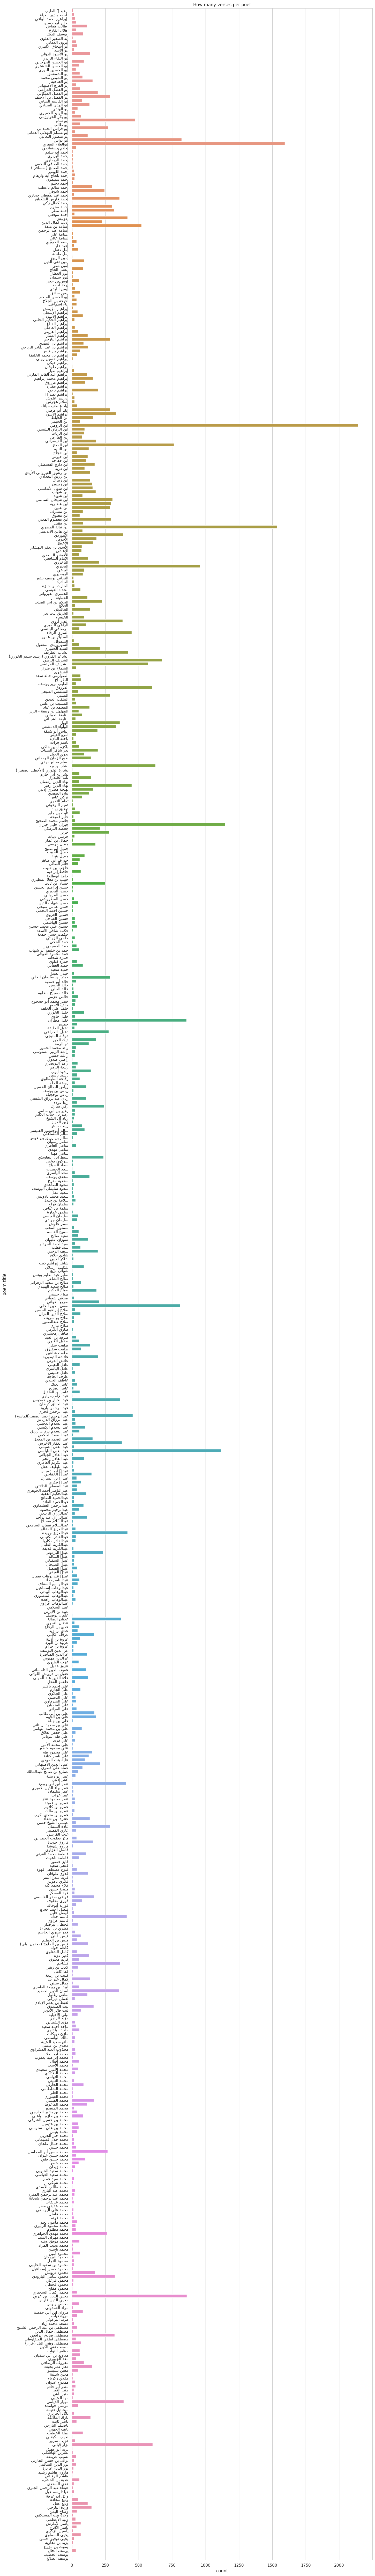

In [29]:
plt.figure(figsize=(15,128))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="poem_title", data=df_res2)
ax.set(xlabel='count', ylabel='poem title', title='How many verses per poet')

#plt.savefig("images/How many verses per poet.pdf")

# Top 10 poet_name have  verses

In [30]:
df_poet_name_top = df.groupby("poet_name", sort=False).count()
df_poet_name_top

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link
poet_name,,,,,,,,
بدر شاكر السياب,193,193,193,193,193,193,193,193
نزار قباني,605,605,605,605,605,605,605,605
أمل دنقل,45,45,45,45,45,45,45,45
فاروق جويدة,158,158,158,158,158,158,158,158
أولاد أحمد,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...
المعتمد بن عباد,133,133,133,133,133,133,133,133
علي محمد الأمير,7,7,7,7,7,7,7,7
علي طه النوباني,7,7,7,7,7,7,7,7


In [31]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().reset_index()
df_poet_name_top

,poet_name,poem_title
0,عبد الله الطيب,8
1,أحمد بشير العيلة,15
2,إبراهيم أحمد الوافي,25
3,جابر أبو حسين,32
4,طالب همّاش,113
...,...,...
647,يزيد بن معاوية,9
648,يموت بن مزرع,5
649,يوسف الخال,29
650,يوسف الخطيب,3


In [32]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().rename('count_verses').reset_index()
df_poet_name_top

,poet_name,count_verses
0,عبد الله الطيب,8
1,أحمد بشير العيلة,15
2,إبراهيم أحمد الوافي,25
3,جابر أبو حسين,32
4,طالب همّاش,113
...,...,...
647,يزيد بن معاوية,9
648,يموت بن مزرع,5
649,يوسف الخال,29
650,يوسف الخطيب,3


In [33]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=False). \
head(10)
df_poet_name_top

,poet_name,count_verses
106,ابن الرومي,2142
34,أبوالعلاء المعري,1593
132,ابن نباتة المصري,1534
208,جبران خليل جبران,1148
368,عبد الغني النابلسي,1115
142,البحتري,959
584,محيي الدين بن عربي,860
258,خليل مطران,857
33,أبو نواس,821
331,صفي الدين الحلي,811


In [34]:
type(df_poet_name_top)

pandas.core.frame.DataFrame

In [35]:
df_poet_name_top["poet_name_reshape"]  = df_poet_name_top.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'Top 10 poet name have verses')]

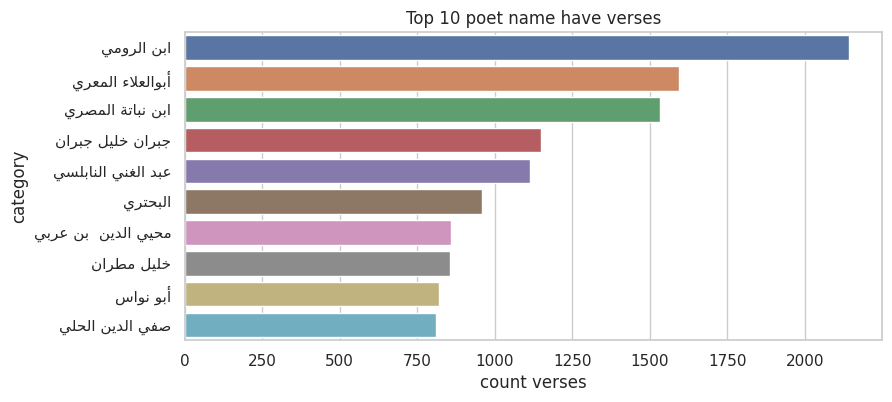

In [36]:
plt.figure(figsize=(9,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_top)
ax.set(xlabel='count verses', ylabel='category', title='Top 10 poet name have verses')

# Low 10 poet_name have  verses

In [37]:
df_poet_name_low = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=True) \
                                                    .head(10)
df_poet_name_low

,poet_name,count_verses
651,يوسف الصائغ,1
513,مؤيد الراوي,1
495,كاظم جواد,1
62,أمل طنانة,1
409,عبيد بن الأبرص,1
392,عبدالكريم الطبال,1
336,صلاح نيازي,1
90,إبراهيم خيكي,1
528,محمد التهامي,1
306,سلمة بن عياض,1


In [38]:
df_poet_name_low["poet_name_reshape"]  = df_poet_name_low.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'Low 10 poet name have verses')]

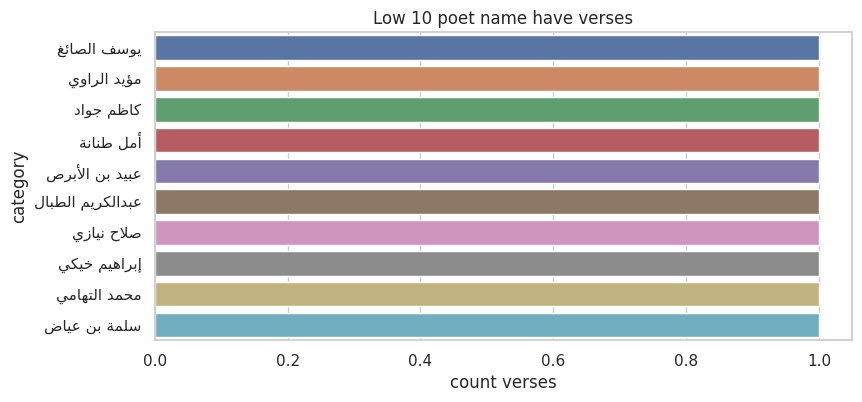

In [39]:
plt.figure(figsize=(9,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_low)
ax.set(xlabel='count verses', ylabel='category', title='Low 10 poet name have verses')

###  for which era does the verse belong?

In [40]:
# Select unique values from the species column
df['poet_cat'].unique()

array(['العراق', 'سوريا', 'مصر', 'تونس', 'السعودية', 'لبنان', 'فلسطين',
       'اليمن', 'العصر الجاهلي', 'العصر الأندلسي', 'السودان', 'البحرين',
       'العصر الإسلامي', 'العصر العباسي', 'ليبيا', 'عمان', 'المغرب',
       'الجزائر', 'الإمارات', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'شعراء العراق والشام', 'أفغانستان', 'إيران'], dtype=object)

In [41]:
groupby_era = df.groupby('poet_cat')

In [42]:
groupby_era.first()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_id,poet_link,poet_name
poet_cat,,,,,,,,
أفغانستان,83898,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,ان ذا البلعمي والعين غين وهوعار علي الزمان وش...,إن ذا البلعمي والعين غيّن,661,http://www.adab.com/modules.php?name=Sh3er&doW...,أبو بكر الخوارزمي
إيران,84748,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لولا رجاءي ثانيا لقاءه ما كنت احيا ساعة في نا...,لولا رجائي ثانياً للقائه,693,http://www.adab.com/modules.php?name=Sh3er&doW...,أبو الحسن الجرجاني
الأردن,64441,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يا مدعي عام الواء وخير من فهم القضية ومناط اما...,العبودية الكبرى,330,http://www.adab.com/modules.php?name=Sh3er&doW...,مصطفى وهبي التل (عرار)
الإمارات,6938,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,"حلم تجلي كالندي, في صحوة الورق اواه من نوم الع...",صحوة الورق,144,http://www.adab.com/modules.php?name=Sh3er&doW...,إبراهيم محمد إبراهيم
البحرين,5845,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,طفول نقطة دم في عيون الخليج - استشهدت وداعا اي...,الحجاج يقدم أوراق اعتماده,68,http://www.adab.com/modules.php?name=Sh3er&doW...,قاسم حداد
الجزائر,6412,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,شفق ولعينيك تغريبة البحر يشتعل الارجوان المساء...,عرس البيضاء,137,http://www.adab.com/modules.php?name=Sh3er&doW...,عثمان لوصيف
السعودية,173,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يشهد اله انكم شهداء يشهد الانبياء والاولياء م...,شهداء,19,http://www.adab.com/modules.php?name=Sh3er&doW...,غازي القصيبي
السودان,874,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يا اخي في الشرق في كل سكن يا اخي في الارض في ك...,من أغاني إفريقيا,66,http://www.adab.com/modules.php?name=Sh3er&doW...,محمد الفيتوري
العراق,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [43]:
groupby_era.get_group('العصر الجاهلي')

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
2116,671,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,الا هبي بصحنك فاصبحينا ولا تبقي خمور الاندرين...,أَلاَ هُبِّي بِصَحْنِكِ فَاصْبَحِيْنَا ( معلقة ),العصر الجاهلي,55,http://www.adab.com/modules.php?name=Sh3er&doW...,عمرو بن كلثوم
2117,672,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اجمع صحبتي سحر ارتحالا ولم اشعر بين منك هالا ...,أأجمع صحبتي,العصر الجاهلي,55,http://www.adab.com/modules.php?name=Sh3er&doW...,عمرو بن كلثوم
2118,673,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,الا من مبلغ عمرو بن هند فما رعيت ذمامة من رعي...,ألا من مبلغ,العصر الجاهلي,55,http://www.adab.com/modules.php?name=Sh3er&doW...,عمرو بن كلثوم
2119,674,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اعمرو بن قيس ان نسركم غدا واب الي اهل الاصارم...,إن نسركم غدا,العصر الجاهلي,55,http://www.adab.com/modules.php?name=Sh3er&doW...,عمرو بن كلثوم
11222,17326,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,تطاول ليلي بهم وصب ودمع كسح السقاء السرب لعب ...,تَطاولَ ليلي بهمٍّ وَصِبْ,العصر الجاهلي,163,http://www.adab.com/modules.php?name=Sh3er&doW...,أبو طالب
...,...,...,...,...,...,...,...,...,...
53254,80566,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اذا كانت قرابتكم علينا مقومة اعنتها الينا فان...,إِذا كانَت قَرابَتُكُم عَلَينا,العصر الجاهلي,574,http://www.adab.com/modules.php?name=Sh3er&doW...,كليب بن ربيعة
53255,80555,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يا طيرة بين نبات اخضر جاءت عليها ناقة بمنكر ا...,يا طَيرَةً بَينَ نَباتٍ أَخضَرِ,العصر الجاهلي,574,http://www.adab.com/modules.php?name=Sh3er&doW...,كليب بن ربيعة
53256,80564,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لقد عرفت قحطان صبري ونجدتي غداة خزاز والحقوق ...,لَقَد عَرَفَت قَحطانُ صَبري وَنَجدَتي,العصر الجاهلي,574,http://www.adab.com/modules.php?name=Sh3er&doW...,كليب بن ربيعة
53257,80563,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,يا لك من قبرة بمعمري لا ترهبي خوفا ولا تستنكر...,يا لَكِ مِن قُبَّرَةٍ بِمَعمَري,العصر الجاهلي,574,http://www.adab.com/modules.php?name=Sh3er&doW...,كليب بن ربيعة


In [44]:
groupby_era_count  = groupby_era['poem_title'].count()
#roupby_era_count

In [45]:
res3 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_era_count.items()}
#res3
df_res3= pd.DataFrame(res3.items(), columns=['era', 'count'])
df_res3

,era,count
0,ﻥﺎﺘﺴﻧﺎﻐﻓﺃ,70
1,ﻥﺍﺮﻳﺇ,90
2,ﻥﺩﺭﻷﺍ,265
3,ﺕﺍﺭﺎﻣﻹﺍ,563
4,ﻦﻳﺮﺤﺒﻟﺍ,554
5,ﺮﺋﺍﺰﺠﻟﺍ,405
6,ﺔﻳﺩﻮﻌﺴﻟﺍ,1931
7,ﻥﺍﺩﻮﺴﻟﺍ,403
8,ﻕﺍﺮﻌﻟﺍ,4252
9,ﻲﺴﻟﺪﻧﻷﺍ ﺮﺼﻌﻟﺍ,6296


[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'which era does the verse belong')]

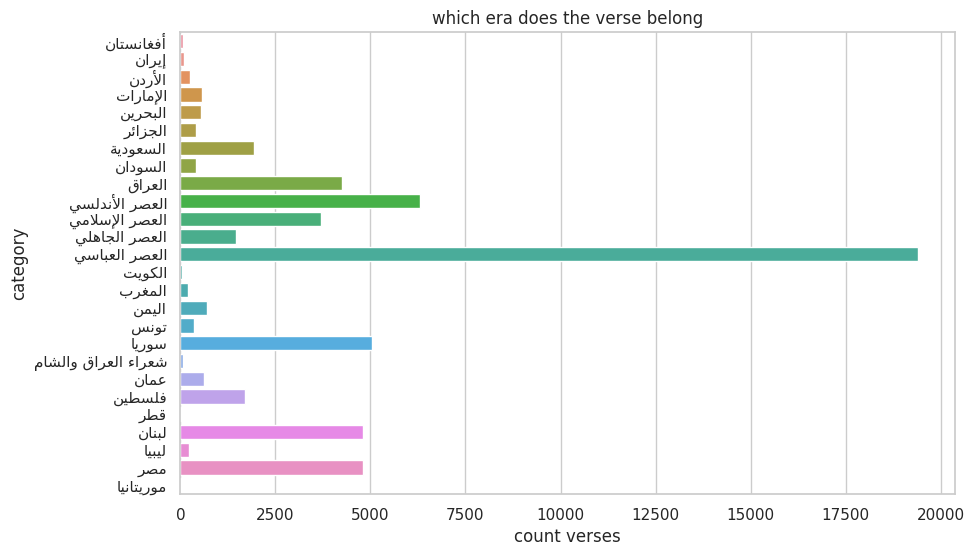

In [46]:
plt.figure(figsize=(10,6))

#ax = sns.barplot(x="Word", y="Frequency", data=boxdata)
ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="era", data=df_res3)

ax.set(xlabel='count verses', ylabel='category', title='which era does the verse belong')
#plt.savefig("images/for which era does the verse belong.pdf")

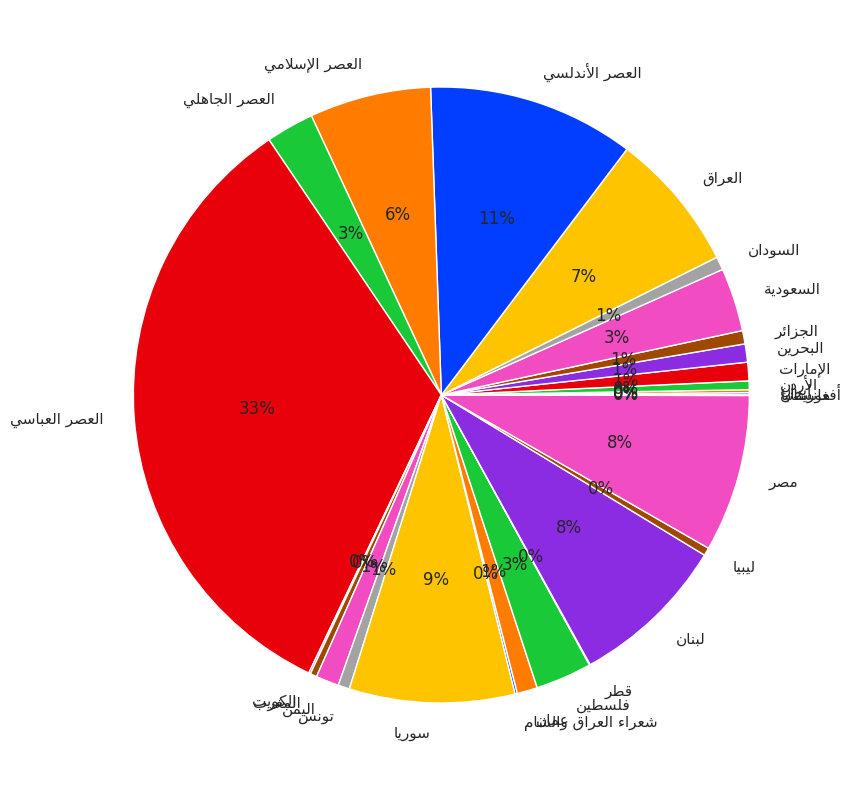

In [47]:
#لتغير الرسم يتم التغير بالارقام
plt.figure(figsize=(24,10))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_res3['count'], labels = df_res3['era'], colors = colors, autopct='%.0f%%')
plt.show()

# short method

In [48]:
df_poet_cat = df.groupby("poet_cat", sort=True)['poem_title'].count().rename('count_verses').reset_index()
df_poet_cat

,poet_cat,count_verses
0,أفغانستان,70
1,إيران,90
2,الأردن,265
3,الإمارات,563
4,البحرين,554
5,الجزائر,405
6,السعودية,1931
7,السودان,403
8,العراق,4252
9,العصر الأندلسي,6296


In [49]:
df_poet_cat["category_reshape"]  = df_poet_cat.poet_cat.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'which era does the verse belong')]

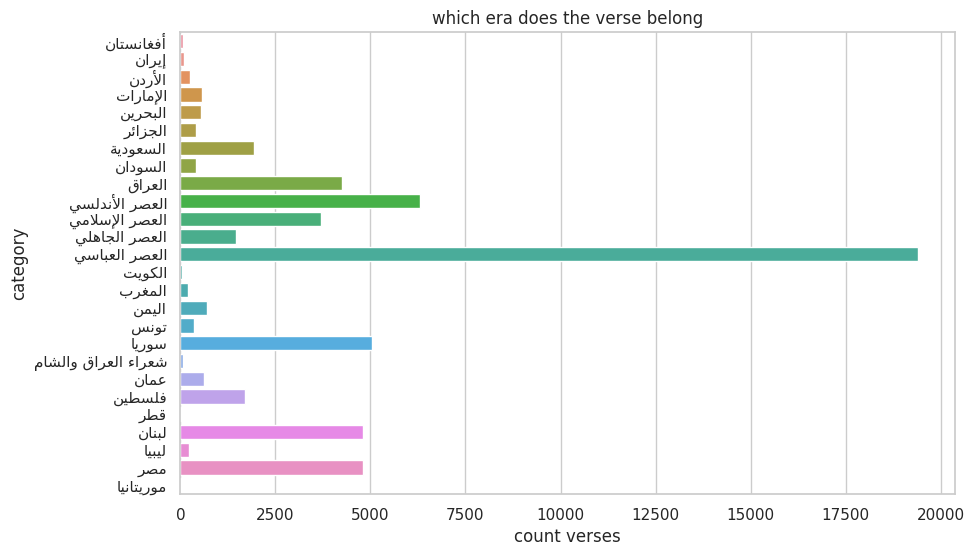

In [50]:
plt.figure(figsize=(10,6))

#ax = sns.barplot(x="Word", y="Frequency", data=boxdata)
ax = sns.set(style="whitegrid")
ax = sns.barplot(x=df_poet_cat.count_verses, y= df_poet_cat.category_reshape )

ax.set(xlabel='count verses', ylabel='category', title='which era does the verse belong')
#plt.savefig("images/for which era does the verse belong.pdf")

###   What is the most common word?

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    word_list, count_list=[], []
    for word,count in most[:40]:
        if (word not in stop):
            word_list.append(get_display(arabic_reshaper.reshape(word)))
            count_list.append(count)

    return word_list,count_list

word_list,count_list =  plot_top_non_stopwords_barchart(df['poem_text'])
#word_list,count_list

In [53]:
len (word_list) , len (count_list)

(13, 13)

In [54]:
data = {
    'word_list':word_list,
    'count_list':count_list
}
df_most_common_word= pd.DataFrame(data)
df_most_common_word.head(10)

,word_list,count_list
0,ﻲﻠﻋ,86911
1,ﻥﺍ,76104
2,ﻲﻟﺍ,42479
3,ﺍﺫﺍ,40267
4,ﻭﺍ,27370
5,ﻻﺍ,26087
6,ﻪﻟﺍ,19796
7,ﻲﺘﺣ,19180
8,ﺎﻧﺍ,15932
9,ﻥﺍﻭ,14314


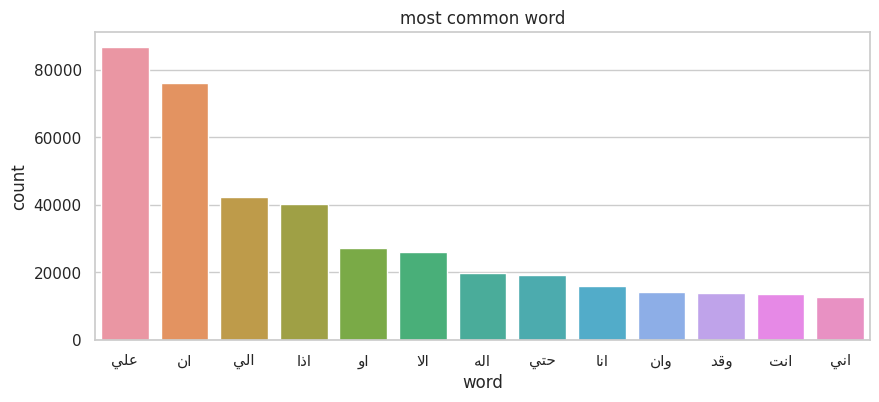

In [55]:
plt.figure(figsize=(10,4))

sns.set(style="whitegrid")
ax = sns.barplot(x=df_most_common_word.word_list,y=df_most_common_word.count_list)
ax.set(xlabel='word', ylabel='count', title='most common word')

#plt.show()
plt.savefig("images/top_non_stopwords.pdf")

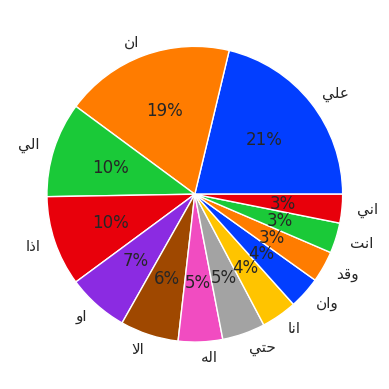

In [56]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_most_common_word.count_list, labels = df_most_common_word.word_list, colors = colors, autopct='%.0f%%')
plt.show()

### How many words within each verse?

In [57]:
df['word_count'] = df.poem_text.str.split().str.len()

In [58]:
df.head()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name,word_count
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب,509
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب,660
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب,264
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب,222
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب,264


In [59]:
df_word_count = df[df.word_count > 6666].head(10)
df_word_count

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name,word_count
13266,60486,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,دع الوم ان الوم عون النواءب ولا تجاوز فيه حد ...,دعِ اللومَ إن اللوم عون النوائِب,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,9111
13534,60754,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م ابين ضلوعي جمرة توقدص علي ما مضي ام حسرة تج...,م أبَيْنَ ضُلوعي جمرة تتوقدص على ما مضى أَمْ ح...,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,8787
14761,61982,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م طل دمع هريق في الاطلالص بعد اقواءها من الحل...,م طل دمع هريق في الأطلالص بعد إقوائها من الحُل...,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,8989
14771,61992,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,خصيم اليالي والغواني مظلم وعهد اليالي والغوان...,خصيمُ الليالي والغواني مُظلَّم,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,12951
15103,62324,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م ولع الزمان بان يحرك ساكنا وبان يثير من الاو...,م وَلع الزمانُ بأن يحرك ساكِناً,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,7128
15287,15397,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,سقتني حميا الحب راحة مقلتي وكاسي محيا من عن ا...,سقتني حميَّا الحبِّ راحة َ مقلتي,العصر العباسي,175,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الفارض,7869


In [60]:
df_word_count.shape

(6, 10)

In [61]:
# clean and normalize text
df_word_count["poem_title_reshaper"]  = df_word_count.poem_title.apply(lambda x: add_arabic_Reshaper(x))

In [62]:
df_word_count.head()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name,word_count,poem_title_reshaper
13266,60486,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,دع الوم ان الوم عون النواءب ولا تجاوز فيه حد ...,دعِ اللومَ إن اللوم عون النوائِب,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,9111,ﺐﺋﺍﻮﻨﻟﺍ ﻥﻮﻋ ﻡﻮﻠﻟﺍ ﻥﺇ ﻡﻮﻠﻟﺍ ﻉﺩ
13534,60754,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م ابين ضلوعي جمرة توقدص علي ما مضي ام حسرة تج...,م أبَيْنَ ضُلوعي جمرة تتوقدص على ما مضى أَمْ ح...,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,8787,ﺩﺪﺠﺘﺗ ﺓﺮﺴﺣ ﻡﺃ ﻰﻀﻣ ﺎﻣ ﻰﻠﻋ ﺹﺪﻗﻮﺘﺗ ﺓﺮﻤﺟ ﻲﻋﻮﻠﺿ ﻦ...
14761,61982,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م طل دمع هريق في الاطلالص بعد اقواءها من الحل...,م طل دمع هريق في الأطلالص بعد إقوائها من الحُل...,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,8989,ﻝﻼﺤﻟﺍ ﻦﻣ ﺎﻬﺋﺍﻮﻗﺇ ﺪﻌﺑ ﺺﻟﻼﻃﻷﺍ ﻲﻓ ﻖﻳﺮﻫ ﻊﻣﺩ ﻞﻃ ﻡ
14771,61992,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,خصيم اليالي والغواني مظلم وعهد اليالي والغوان...,خصيمُ الليالي والغواني مُظلَّم,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,12951,ﻢﻠﻈﻣ ﻲﻧﺍﻮﻐﻟﺍﻭ ﻲﻟﺎﻴﻠﻟﺍ ﻢﻴﺼﺧ
15103,62324,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,م ولع الزمان بان يحرك ساكنا وبان يثير من الاو...,م وَلع الزمانُ بأن يحرك ساكِناً,العصر العباسي,173,http://www.adab.com/modules.php?name=Sh3er&doW...,ابن الرومي,7128,ﺎﻨﻛﺎﺳ ﻙﺮﺤﻳ ﻥﺄﺑ ﻥﺎﻣﺰﻟﺍ ﻊﻟﻭ ﻡ


[Text(0.5, 0, 'word'),
 Text(0, 0.5, 'poem title'),
 Text(0.5, 1.0, 'How many words within each verse')]

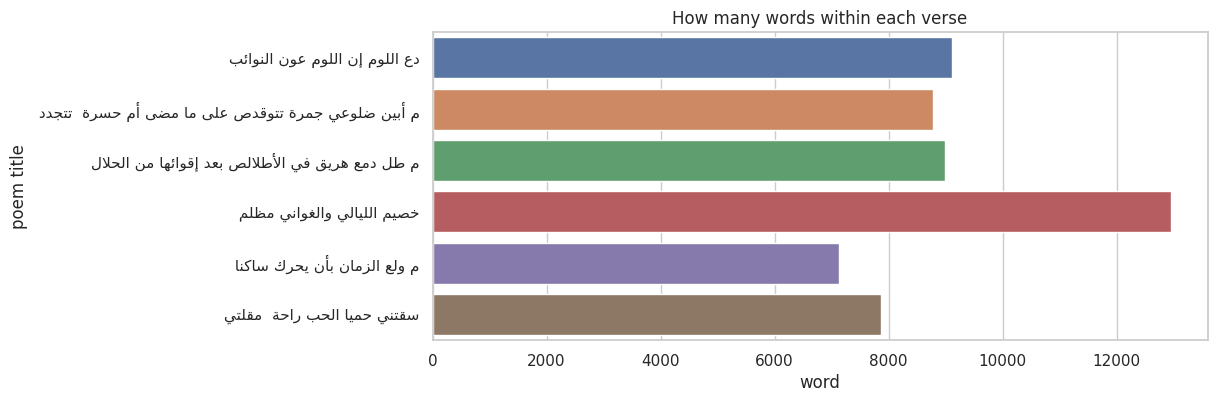

In [63]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="word_count", y="poem_title_reshaper", data=df_word_count)
ax.set(xlabel='word', ylabel='poem title', title='How many words within each verse')

#plt.savefig("images/How many words within each verse.pdf")

# Generating Word Cloud

In [64]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('arabic'))
print( len (stopwords))
#print (stopwords)

701


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
#stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df.poem_text[:20]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = get_display(arabic_reshaper.reshape(tokens[i].lower()))

    comment_words += " ".join(tokens)+" "


In [ ]:
comment_words

'ﻙﺎﻨﻴﻋ ﺎﺘﺑﺎﻏ ﻞﻴﺨﻧ ﺔﻋﺎﺳ ﺮﺤﺴﻟﺍ ﻭﺍ ﻥﺎﺘﻓﺮﺷ ﺡﺍﺭ ﻱﺎﻨﻳ ﺎﻤﻬﻨﻋ ﺮﻤﻘﻟﺍ ﻙﺎﻨﻴﻋ ﻦﻴﺣ ﻥﺎﻤﺴﺒﺗ ﻕﺭﻮﺗ ﻡﻭﺮﻜﻟﺍ ﺺﻗﺮﺗﻭ ﺀﺍﻮﺿﻻﺍ ﺭﺎﻤﻗﻻﺎﻛ ﻲﻓ ﺮﻬﻧ ﻪﺟﺮﻳ ﻑﺍﺬﺠﻤﻟﺍ ﺎﻨﻫﻭ ﺔﻋﺎﺳ ﺮﺤﺴﻟﺍ ﺎﻤﻧﺎﻛ ﺾﺒﻨﺗ ﻲﻓ ﺎﻤﻬﻳﺭﻮﻏ ﻡﻮﺠﻨﻟﺍ ﻥﺎﻗﺮﻐﺗﻭ ﻲﻓ ﺏﺎﺒﺿ ﻦﻣ ﻲﺳﺍ ﻒﻴﻔﺷ ﺮﺤﺒﻟﺎﻛ ﺡﺮﺳ ﻦﻳﺪﻴﻟﺍ ﻪﻗﻮﻓ ﺀﺎﺴﻤﻟﺍ ﺀﻑﺩ ﺀﺎﺘﺸﻟﺍ ﻪﻴﻓ ﺔﺷﺎﻌﺗﺭﺍﻭ ﻒﻳﺮﺨﻟﺍ ﺕﻮﻤﻟﺍﻭ ﺩﻼﻴﻤﻟﺍﻭ ﻡﻼﻈﻟﺍﻭ ﺀﺎﻴﻀﻟﺍﻭ ﻖﻴﻔﺘﺴﺘﻓ ﺀﻞﻣ ﻲﺣﻭﺭ ﺔﺸﻋﺭ ﺀﺎﻜﺒﻟﺍ ﺓﻮﺸﻧﻭ ﺔﻴﺸﺣﻭ ﻖﻧﺎﻌﺗ ﺀﺎﻤﺴﻟﺍ ﺓﻮﺸﻨﻛ ﻞﻔﻄﻟﺍ ﺍﺫﺍ ﻑﺎﺧ ﻦﻣ ﺮﻤﻘﻟﺍ ﻥﺎﻛ ﺱﺍﻮﻗﺍ ﺏﺎﺤﺴﻟﺍ ﺏﺮﺸﺗ ﻡﻮﻴﻐﻟﺍ ﺓﺮﻄﻗﻭ ﺓﺮﻄﻘﻓ ﺏﻭﺬﺗ ﻲﻓ ﺮﻄﻤﻟﺍ ﺮﻛﺮﻛﻭ ﻝﺎﻔﻃﻻﺍ ﻲﻓ ﺵﺀﺍﺮﻋ ﻡﻭﺮﻜﻟﺍ ﺖﻏﺪﻏﺩﻭ ﺖﻤﺻ ﺮﻴﻓﺎﺼﻌﻟﺍ ﻲﻠﻋ ﺮﺠﺸﻟﺍ ﺓﺩﻮﺸﻧﺍ ﺮﻄﻤﻟﺍ ﺮﻄﻣ ﺮﻄﻣ ﺮﻄﻣ ﺏﺀﺎﺜﺗ ﺀﺎﺴﻤﻟﺍ ﻡﻮﻴﻐﻟﺍﻭ ﺎﻣ ﻝﺍﺰﺗ ﺢﺴﺗ ﺎﻣ ﺢﺴﺗ ﻦﻣ ﺎﻬﻋﻮﻣﺩ ﻝﺎﻘﺜﻟﺍ ﻥﺎﻛ ﻼﻔﻃ ﺕﺎﺑ ﻱﺬﻬﻳ ﻞﺒﻗ ﻥﺍ ﻡﺎﻨﻳ ﻥﺎﺑ ﻪﻣﺍ – ﻲﺘﻟﺍ ﻕﺎﻓﺍ ﺬﻨﻣ ﻡﺎﻋ ﻢﻠﻓ ﺎﻫﺪﺠﻳ ﻢﺛ ﻦﻴﺣ ﺞﻟ ﻲﻓ ﻝﺍﺀﺲﻟﺍ ﺍﻮﻟﺎﻗ ﻪﻟ ﺪﻌﺑ" ﺪﻏ ﺩﻮﻌﺗ " ﻻ ﺪﺑ ﻥﺍ ﺩﻮﻌﺗ ﻥﺍﻭ ﺲﻣﺎﻬﺗ ﻕﺎﻓﺮﻟﺍ ﺎﻬﻧﺍ ﻙﺎﻨﻫ ﻲﻓ ﺐﻧﺎﺟ ﻞﺘﻟﺍ ﻡﺎﻨﺗ ﺔﻣﻮﻧ ﺩﻮﺤﻟﺍ ﻒﺴﺗ ﻦﻣ ﺎﻬﺑﺍﺮﺗ ﺏﺮﺸﺗﻭ ﺮﻄﻤﻟﺍ ﻥﺎﻛ ﺍﺩﺎﻴﺻ ﺎﻨﻳﺰﺣ ﻊﻤﺠﻳ ﻙﺎﺒﺸﻟﺍ ﻦﻌﻠﻳﻭ ﻩﺎﻴﻤﻟﺍ ﺭﺪﻘﻟﺍﻭ ﺮﺜﻨﻳﻭ ﺀﺎﻨﻐﻟﺍ ﺚﻴﺣ ﻞﻓﺎﻳ ﺮﻤﻘﻟﺍ ﺮﻄﻣ ﺮﻄﻣ ﻦﻴﻤﻠﻌﺗﺍ ﻱﺍ ﻥﺰﺣ ﺚﻌﺒﻳ ﺮﻄﻤﻟﺍ ﻒﻴﻛﻭ ﺞﺸﻨﺗ ﺐﻳﺭﺍﺰﻤﻟﺍ ﺍﺫﺍ ﺮﻤﻬﻧﺍ ﻒﻴﻛﻭ ﺮﻌﺸﻳ ﺪﻴﺣﻮﻟﺍ ﻪﻴﻓ ﻉﺎﻴﻀﻟﺎﺑ ﻼﺑ ﺀﺎﻬﺘﻧﺍ – ﻡﺪﻟﺎﻛ ﻕﺍﺮﻤﻟﺍ ﻉﺎﻴﺠﻟﺎﻛ ﺐﺤﻟﺎﻛ ﻝﺎﻔﻃﻻﺎﻛ ﻲﺗﻮﻤﻟﺎ

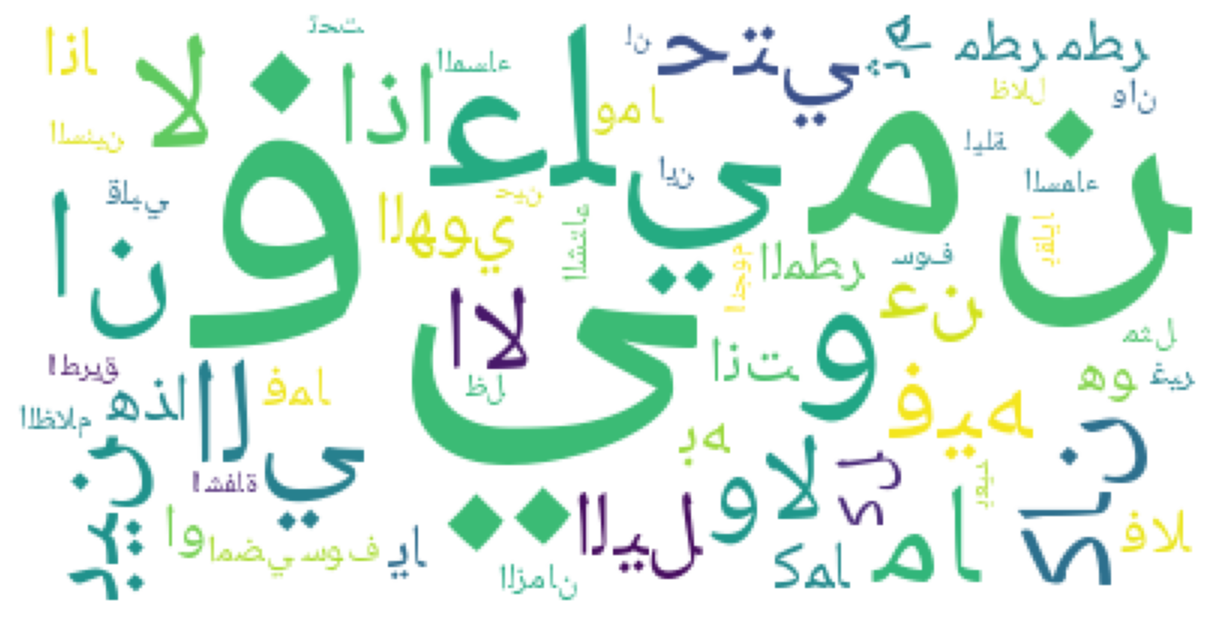

In [66]:
# Make text readable for a non-Arabic library like wordcloud
text = get_display(arabic_reshaper.reshape(comment_words))
text = get_display(text)

# Generate a word cloud image
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic-Regular.ttf',
                        background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)

# Export to an image
wordcloud.to_file("arabic_example.png")

# plot the WordCloud image
plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()